<div style="text-align: right">
    <img src="img/BBWS2023_cropped.png" alt="" width="1200" id="hp"/>
</div>

# Tutorial 1: from BigBrains to BrainSpaces

🇮🇸 7th BigBrain Workshop, Reykjavík, Iceland, October 4 2023. By HBHL

**Content creators:** Jessica Royer, RaulR. Cruces, Boris Bernhardt. MICA lab

## 🐳 Tutorial Objectives

Estimated timing of tutorial: 40 minutes

### 🌋 Contextualization of BigBrain in a standarized MRI-compatible surface space
1. In this notebook we'll use the BigBrain intensities already mapped to an standarized brain surface (fsLR-32k **ref**). 
2. Build a microstructural profile covariance matrix derived from the BigBrain intensities
3. Use a dimentionality redution technique to highlight the major non-linear axis of variance from the MPC matrix.
4. Use a public MRI 3T database derivatives to assess the similarity between BigBrain histological stain intensities and a myelin-sensitive MRI acquisition.


### 🏔️ Overview:

1. Download the BigBrain intensity profiles using BrainSpace
2. Plot the mean intensities over the brain surface
3. Calculate the MPC matrix ROI-based 
4. Apply diffusion embeding mapping to get the main non-linear eigenvalues from the MPC-big.
5. Download qT1 MPC from the public repository MICs
6. Calculate the group-mean MPC
7. Apply diffusion embeding mapping to get the main non-linear eigenvalues from the MPC-mic.
8. Calculate the correlation of the gradients between MPC-big and MPC-mic
9. User a permutation test to validate the correlation 
10. Plot the correlation with ranked values.


### `Requisites`

```bash
git
bash -y conda -forge install
datalad
datalad-installer
datalad-installer git-annex -m datalad/git-annex:release
numpy
nilearn
wordcloud
matplotlib
pandas
scipy
h5py
pip "brainspace brainstat"
```

# Tutorial 1: Quantitative T1 map intensity profiles
This data is part of the derivatives that were generated using micapipe from the Microstructure-Informed Connectomics (MICs) open dataset avaliable at the CONP portal (https://n2t.net/ark:/70798/d72xnk2wd397j190qv ).

We have here a putative myelin-sensitive MRI marker, T1 relaxometry.

## Why quantitative T1 mapping (qT1)?
thats what we have, deal with it
also thought to be myelin-sensitive

measurement of longitudinal relaxation time (T1) on MRI, referred to as quantitative T1 mapping (qT1), may be sensitive to grey matter myelin conten.
<div style="text-align: right">
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S1053811914001359-gr1_lrg.jpg" alt="" width="400" id="hp"/>
</div>

> Stüber, Carsten, et al. "Myelin and iron concentration in the human brain: a quantitative study of MRI contrast." Neuroimage 93 (2014): 95-106. https://doi.org/10.1016/j.neuroimage.2014.02.026


## What are the Microstructural profile covariance matrices
i dunno

<div style="text-align: right">
<img src="https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/brain/146/9/10.1093_brain_awad125/1/awad125f1.jpeg?Expires=1697661260&Signature=iom0awZonSDzswt5gRNIdp5wK7KwVa-UGon3eJiJYD3iK9rGExDHDQ~AyhYiJCU-GLkPYePpcTLaEAhbmhPQD0Wqn-6pCUmT8g8xdJdWtaGZisfAq8L31jWndioJWp~R5IpRBMxMfbjSKDiK0JmmRj1HaBGSiSstFnAcdgHygsuI2d7NiEklw2jsE3SsClQWjWMd5jkmuJhT5t9N689INXt9kQeSmyEz9Yfi2WHcODKXUF0d13qO8uiBw9uC1KnvMRwzU3jSMOjw9GaSjhmrYwz9JwLVLpvGCwJ-9vqlvaYqoPgoxFNo~XqM5Xai8dhlK3oXnUpZT4lJCkh-CEan8A__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA" alt="" width="800" id="hp"/>
</div>

> Royer, Jessica, et al. "Cortical microstructural gradients capture memory network reorganization in temporal lobe epilepsy." Brain 146.9 (2023): 3923-3937. https://doi.org/10.1093/brain/awad125

## How they were calculated
see figure

## How can I generate my own MPC
good luck

## Where to get pre-calculated MPC matrices
<div style="text-align: right">
<img src="https://portal.conp.ca/dataset_logo?id=projects/mica-mics" alt="" width="200" id="hp"/>
</div>
> Royer, Jessica, et al. "An open MRI dataset for multiscale neuroscience." Scientific Data 9.1 (2022): 569. https://doi.org/10.1093/brain/awad125


## see you at the bar!


# How to pull the data?
> Not actually doing it, depends.

In [67]:
%%bash
# Initialite the CONP dataset
datalad install https://github.com/CONP-PCNO/conp-dataset.git

install(notneeded): /host/yeatman/local_raid/rcruces/git_here/2023_BigBrain_workshop_BigBrains-BrainSpaces/code/conp-dataset (dataset) [dataset <Dataset path=/host/yeatman/local_raid/rcruces/git_here/2023_BigBrain_workshop_BigBrains-BrainSpaces/code/conp-dataset> was already cloned from 'https://github.com/CONP-PCNO/conp-dataset.git']


In [68]:
%%bash 
# Install the mica-mics dataset
cd conp-dataset
datalad get projects/mica-mics/MICs_release/derivatives/micapipe/sub-*/ses-*/anat/micro_profiles/*_space-fsnative_atlas-schaefer400_desc-mpc.txt

get(notneeded): /host/yeatman/local_raid/rcruces/git_here/2023_BigBrain_workshop_BigBrains-BrainSpaces/code/conp-dataset/projects/mica-mics/MICs_release/derivatives/micapipe/sub-HC001/ses-01/anat/micro_profiles/sub-HC001_ses-01_space-fsnative_atlas-schaefer400_desc-mpc.txt (file) [already present]
get(notneeded): /host/yeatman/local_raid/rcruces/git_here/2023_BigBrain_workshop_BigBrains-BrainSpaces/code/conp-dataset/projects/mica-mics/MICs_release/derivatives/micapipe/sub-HC002/ses-01/anat/micro_profiles/sub-HC002_ses-01_space-fsnative_atlas-schaefer400_desc-mpc.txt (file) [already present]
get(notneeded): /host/yeatman/local_raid/rcruces/git_here/2023_BigBrain_workshop_BigBrains-BrainSpaces/code/conp-dataset/projects/mica-mics/MICs_release/derivatives/micapipe/sub-HC003/ses-01/anat/micro_profiles/sub-HC003_ses-01_space-fsnative_atlas-schaefer400_desc-mpc.txt (file) [already present]
get(notneeded): /host/yeatman/local_raid/rcruces/git_here/2023_BigBrain_workshop_BigBrains-BrainSpaces/

# BigBrain gradients

> Paquola, Casey, et al. "The BigBrainWarp toolbox for integration of BigBrain 3D histology with multimodal neuroimaging." Elife 10 (2021): e70119. https://doi.org/10.7554/eLife.70119


> Paquola, Casey, et al. "Microstructural and functional gradients are increasingly dissociated in transmodal cortices." PLoS biology 17.5 (2019): e3000284.  https://doi.org/10.1371/journal.pbio.3000284




1. Pull BigBrain intensities, parcellate, and plot them - why not
2. Generate MPC from BB intensity and plot
3. Generate gradients from BB MPC and plot


# MICA-MICs
to do at subject and group-average levels

1. Pull MICA-MICs MPC matrix, average across subjects and plot
2. Generate gradients from MICA-MICs MPC and plot
3. Align subject-level gradient to the group average gradient - AND EXPLAIN WHY i DONT LIKE WHEN PEOPLE JUST SAY THINGS AND TDONT EXPLAIN THEM LIKE WHATS THE POINT
4. Correlate with BB gradient: wow -0.57 correlation
5. WHYYY the rank difference PLOT it!!
6. Run null model (spin test) to assess significance of BB-MRI correlation

In [69]:
# Hide this section
# Set python environment
import numpy as np
import glob
import os
import numpy as np
from nilearn import plotting
import matplotlib as plt
from brainspace.plotting import plot_hemispheres
from brainspace.mesh.mesh_io import read_surface
from brainspace.datasets import load_conte69
from brainspace.gradient import GradientMaps
from brainspace.utils.parcellation import map_to_labels
import matplotlib.pyplot as plt
from brainstat.datasets import fetch_parcellation
import h5py
from brainstat.context.histology import (
    download_histology_profiles,
    compute_histology_gradients,
    compute_mpc,
    read_histology_profile,
)

def load_mpc(path):
    # Load the cortical connectome
    mtx_mpc = np.loadtxt(path, dtype=np.float, delimiter=' ')

    # Fill the lower triangle of the matrix
    MPC = np.triu(mtx_mpc,1)+mtx_mpc.T

    # Renove the medial wall
    MPC = np.delete(np.delete(MPC, 0, axis=0), 0, axis=1)
    MPC = np.delete(np.delete(MPC, 200, axis=0), 200, axis=1)
    
    # replace values close to 0
    MPC[MPC==0] = np.finfo(float).eps
    return(MPC)

# Run the analysis
schaefer_400 = fetch_parcellation("fslr32k", "schaefer", 400)

# Get the mask
mask = schaefer_400 != 0

In [70]:
%%bash
pwd

/host/yeatman/local_raid/rcruces/git_here/2023_BigBrain_workshop_BigBrains-BrainSpaces/code


In [71]:
# Load all the files
MPC_files=sorted(glob.glob("conp-dataset/projects/mica-mics/MICs_release/derivatives/micapipe/sub-*/ses-*/anat/micro_profiles/*_space-fsnative_atlas-schaefer400_desc-mpc.txt"))
Ndim=200

# Load all the  MPC matrices as array
MPC=np.empty([Ndim*2, Ndim*2, len(MPC_files)], dtype=float)
for i, f in enumerate(MPC_files):
    #print(f)
    MPC[:,:,i] = load_mpc(f)

/host/yeatman/local_raid/temporaryLocalProcessing/ipykernel_31990/2016629848.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mtx_mpc = np.loadtxt(path, dtype=np.float, delimiter=' ')


In [8]:
Ndim

200

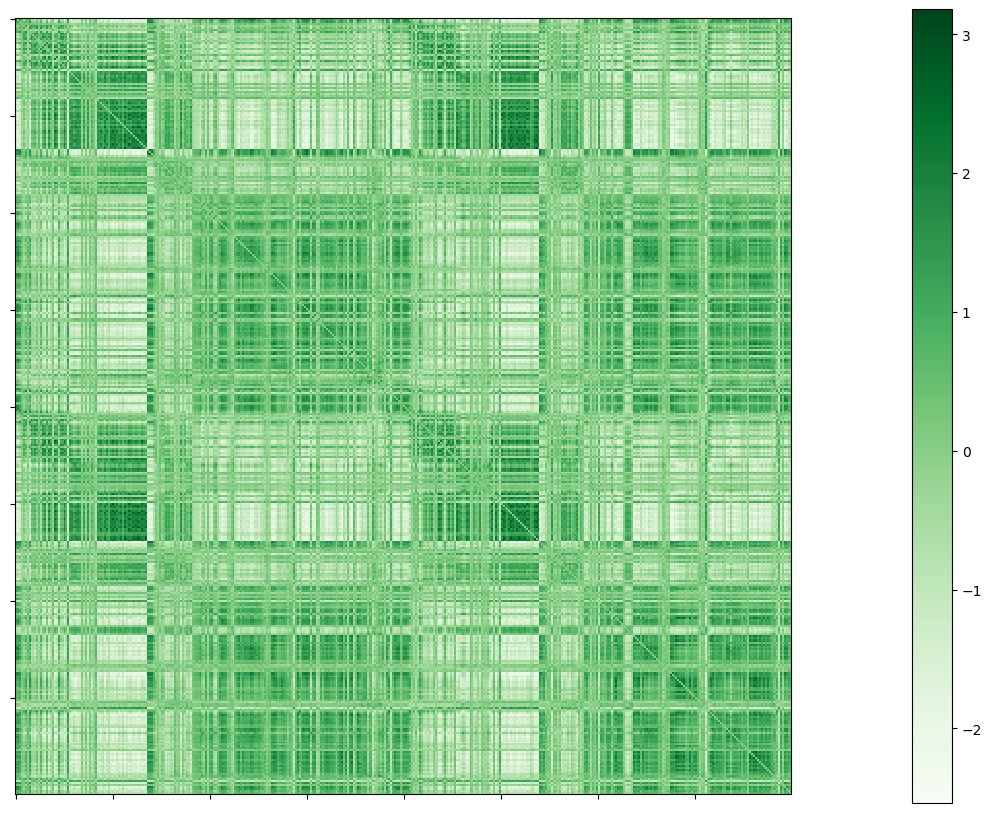

In [9]:
# Plot the mean MPC matrix
MPC_mean = np.mean(MPC, axis=2)
corr_plot = plotting.plot_matrix(MPC_mean, figure=(10, 10), labels=None, cmap='Greens')

In [10]:
micapipe=os.environ['MICAPIPE']
# Here we define the atlas
atlas='schaefer-400'
# Load conte69
surf_lh, surf_rh = load_conte69()

# Read label for conte69
labels_c69 = np.loadtxt(open(micapipe + '/parcellations/'+atlas+'_conte69.csv'), dtype=np.int)
Ndim = max(np.unique(labels_c69[0]))

# mask of the medial wall
mask_c69 = labels_c69 != 0

/host/yeatman/local_raid/temporaryLocalProcessing/ipykernel_31990/3108715287.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_c69 = np.loadtxt(open(micapipe + '/parcellations/'+atlas+'_conte69.csv'), dtype=np.int)


In [11]:
 # Calculate the gradients
Ngrad=5
gm = GradientMaps(n_components=Ngrad, random_state=None, approach='dm', kernel='normalized_angle')
gm.fit(MPC_mean, sparsity=0.8)

GradientMaps(kernel='normalized_angle', n_components=5)

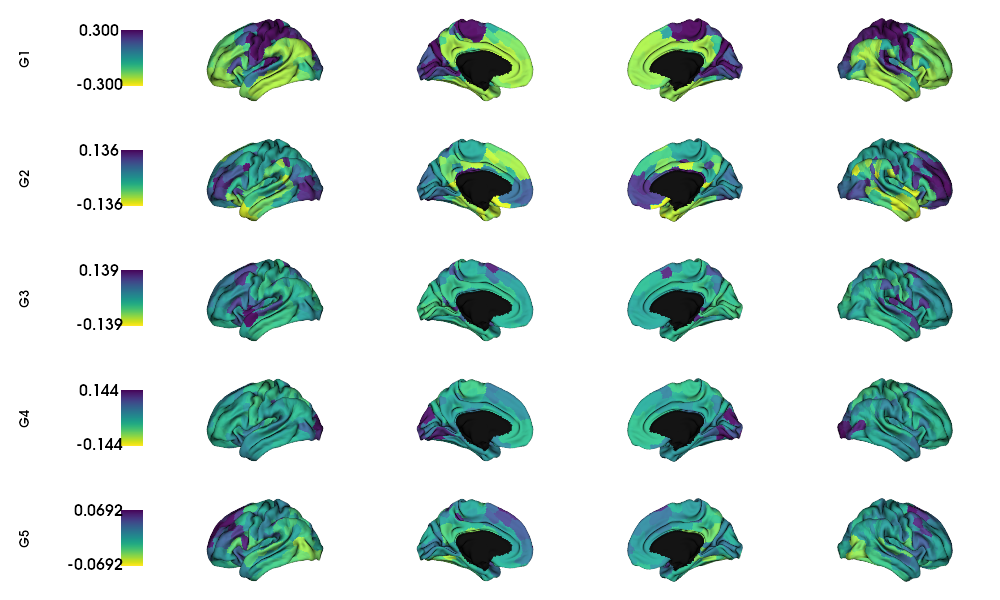

In [12]:
# Map gradients to original parcels
grad = [None] * Ngrad
for i, g in enumerate(gm.gradients_.T[0:Ngrad,:]):
    grad[i] = map_to_labels(g, labels_c69, fill=np.nan, mask=mask_c69)

# Plot Gradients
ylab=['G'+str(x) for x in list(range(1,Ngrad+1))]
plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(1000, 600), cmap='viridis_r',
                  embed_nb=True,  label_text={'left':ylab}, color_bar='left',
                  zoom=1.25, nan_color=(0, 0, 0, 1), color_range='sym' )

# Can we validate this using histological data?

In [13]:
# Download the histology profile from BigBrain
download_histology_profiles(data_dir='./', template='fslr32k', overwrite=True)


2023-09-12 16:11:25,481 - brainstat - INFO - Downloading histology_fslr32k.h5 from https://box.bic.mni.mcgill.ca/s/6zKHcg9xXu5inPR/download.


In [14]:
h5 = h5py.File('./histology_fslr32k.h5','r')
histology_profiles=h5['fs_LR_64k']

In [80]:
surf_lh.points.shape

(32492, 3)

In [78]:
histology_profiles

<HDF5 dataset "fs_LR_64k": shape (50, 64984), type "<f8">

In [76]:
Ngrad=4
mpc = compute_mpc(histology_profiles, labels=schaefer_400)
gradient_map = GradientMaps(n_components=Ngrad, random_state=None, approach='dm', kernel='normalized_angle')
gradient_map.fit(mpc, sparsity=0.9)

GradientMaps(kernel='normalized_angle', n_components=4)

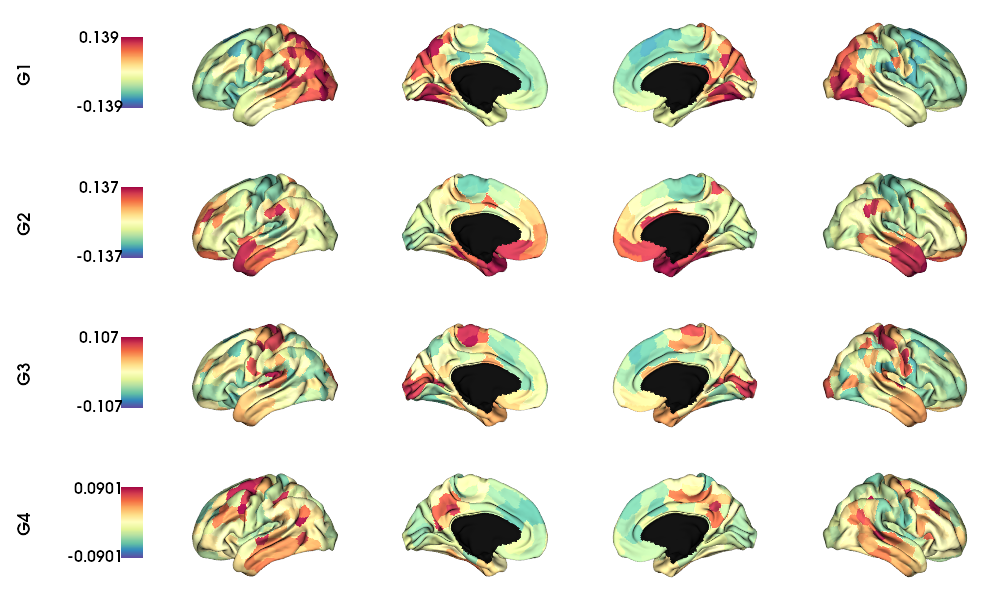

In [77]:
# Map gradients to original parcels
vertexwise_gradient = [None] * Ngrad
for i, g in enumerate(gradient_map.gradients_.T[0:Ngrad,:]):
    vertexwise_gradient[i] = map_to_labels(g, schaefer_400, fill=np.nan, mask=schaefer_400 != 0)

ylab=['G'+str(x) for x in list(range(1,Ngrad+1))]
plot_hemispheres(surf_lh, surf_rh, 
                 array_name=vertexwise_gradient, 
                 size=(1000, 600), 
                 cmap='Spectral_r',
                  embed_nb=True,  
                 label_text={'left':ylab}, 
                 color_bar='left',
                 zoom=1.25, 
                 nan_color=(0, 0, 0, 1), 
                 color_range='sym' )

In [17]:
gm.gradients_.shape

(400, 5)

In [18]:
gradient_map.gradients_.shape

(400, 5)

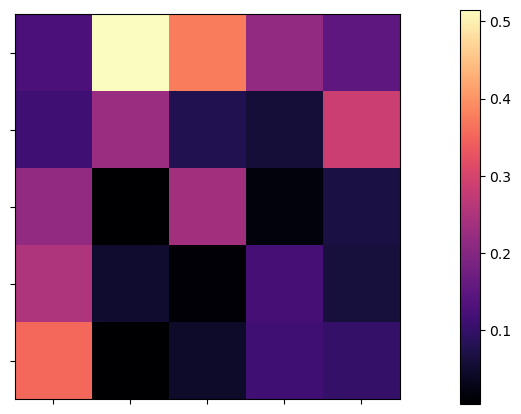

In [24]:
corr = np.corrcoef(gm.gradients_, gradient_map.gradients_, rowvar=False)
plotting.plot_matrix(np.abs(corr[:5,5:]), figure=(5, 5), labels=None, cmap='magma')

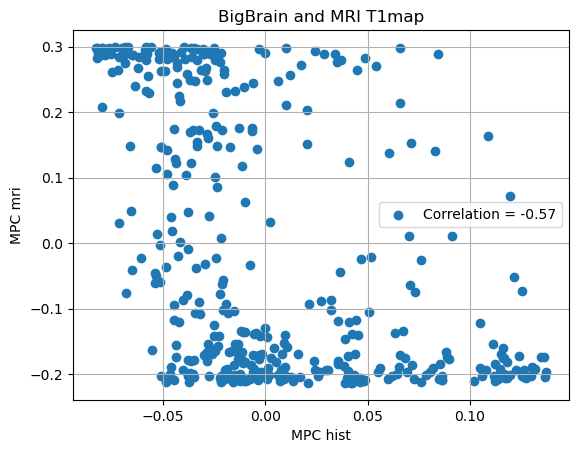

In [85]:
from scipy.stats import spearmanr
from scipy.stats import rankdata

# Calculate the correlation coefficient
g1_his = gradient_map.gradients_[:,1]
g1_mri = gm.gradients_[:,0]

# Remove NaN values
valid_indices = ~np.isnan(g1_his) & ~np.isnan(g1_mri)
#g1_his = rankdata(g1_his[valid_indices])
#g1_mri = rankdata(g1_mri[valid_indices])
g1_his = g1_his[valid_indices]
g1_mri = g1_mri[valid_indices]

# Calculate the Spearman rank correlation coefficient
correlation_coefficient, _ = spearmanr(g1_his, g1_mri)

# Create a scatter plot
plt.scatter(g1_his, g1_mri, label=f'Correlation = {correlation_coefficient:.2f}')
plt.xlabel('MPC hist')
plt.ylabel('MPC mri')
plt.title('BigBrain and MRI T1map')
plt.legend()
plt.grid(True)

# Context decoding of MPC BigBrain G2 - sensory fugal

In [34]:
from brainstat.context.meta_analysis import meta_analytic_decoder
from wordcloud import WordCloud

meta_analysis = meta_analytic_decoder("fslr32k", vertexwise_gradient[1], data_dir='./Neurosynth')
print(meta_analysis)

2023-09-12 17:15:18,065 - brainstat - INFO - Fetching Neurosynth feature files. This may take several minutes if you haven't downloaded them yet.
2023-09-12 17:15:18,150 - brainstat - INFO - Running correlations with all Neurosynth features.
                      Pearson's r
temporal pole            0.132124
anterior temporal        0.113849
dementia                 0.098821
matter volumes           0.062769
amygdala hippocampus     0.045621
...                           ...
stable                  -0.427352
parietal                -0.427718
activities              -0.427995
precuneus               -0.436483
19                      -0.443534

[3228 rows x 1 columns]


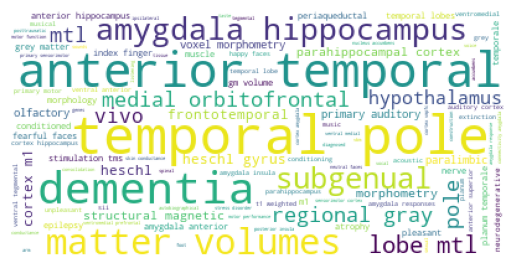

In [35]:
wc = WordCloud(background_color="white", random_state=0)
wc.generate_from_frequencies(frequencies=meta_analysis.to_dict()["Pearson's r"])
plt.imshow(wc)
plt.axis("off")
plt.show()

# Context decoding of MPC MRI G1 - sensory fugal

In [86]:
meta_analysis = meta_analytic_decoder("fslr32k", grad[0], data_dir='./Neurosynth')
print(meta_analysis)

2023-09-13 15:30:53,517 - brainstat - INFO - Fetching Neurosynth feature files. This may take several minutes if you haven't downloaded them yet.
2023-09-13 15:30:53,694 - brainstat - INFO - Running correlations with all Neurosynth features.
                      Pearson's r
dementia                 0.427876
ofc                      0.397677
cortex ofc               0.385091
orbitofrontal            0.374773
orbitofrontal cortex     0.368812
...                           ...
m1                      -0.493208
primary motor           -0.495026
cortex m1               -0.498517
limb                    -0.514972
sensorimotor cortex     -0.520691

[3228 rows x 1 columns]


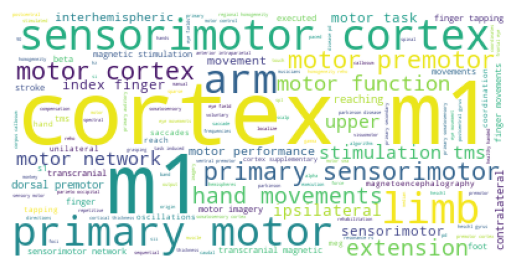

In [37]:
wc = WordCloud(background_color="white", random_state=0)
wc.generate_from_frequencies(frequencies=meta_analysis.to_dict()["Pearson's r"])
plt.imshow(wc)
plt.axis("off")
plt.show()

# How we have used microscopy data to understand the brain macroscale

In [49]:
Gmax=[]
for i in range(MPC.shape[2]):
    # Calculate individual gradient aligned to HIST
    Subjgm = GradientMaps(n_components=Ngrad, alignment='procrustes', kernel='normalized_angle')
    Subjgm.fit(MPC[:,:,i], sparsity=0.9, reference=gradient_map.gradients_)
    

    # Correlate the first 5 gradients
    corr = np.corrcoef(Subjgm.aligned_, gradient_map.gradients_, rowvar=False)
    Gmax.append(np.max(corr[:5,5:]))
    # get the highest correlation valueand the subject
    print('Subject: ' +str(i) + ' Gmax: ' + str(Gmax[i]))

    

Subject: 0 Gmax: 0.4305963450073107
Subject: 1 Gmax: 0.5093146585218029
Subject: 2 Gmax: 0.42607263597604356
Subject: 3 Gmax: 0.42632917971527096
Subject: 4 Gmax: 0.5013349345358495
Subject: 5 Gmax: 0.5046448511818062
Subject: 6 Gmax: 0.5048510997045744
Subject: 7 Gmax: 0.46634437169800613
Subject: 8 Gmax: 0.4723488964885298
Subject: 9 Gmax: 0.49646789933277435
Subject: 10 Gmax: 0.40553227810988696
Subject: 11 Gmax: 0.5000901379603608
Subject: 12 Gmax: 0.4436028909008304
Subject: 13 Gmax: 0.4850214500149608
Subject: 14 Gmax: 0.4007172826776098
Subject: 15 Gmax: 0.5275278669934765
Subject: 16 Gmax: 0.44710474225881947
Subject: 17 Gmax: 0.4896678002487041
Subject: 18 Gmax: 0.4414254828483932
Subject: 19 Gmax: 0.4478413550797088
Subject: 20 Gmax: 0.5431215649940142
Subject: 21 Gmax: 0.5077089517566025
Subject: 22 Gmax: 0.461708362542453
Subject: 23 Gmax: 0.41801176482960206
Subject: 24 Gmax: 0.432966961343655
Subject: 25 Gmax: 0.5261196963495484
Subject: 26 Gmax: 0.5076174109661811
Subjec

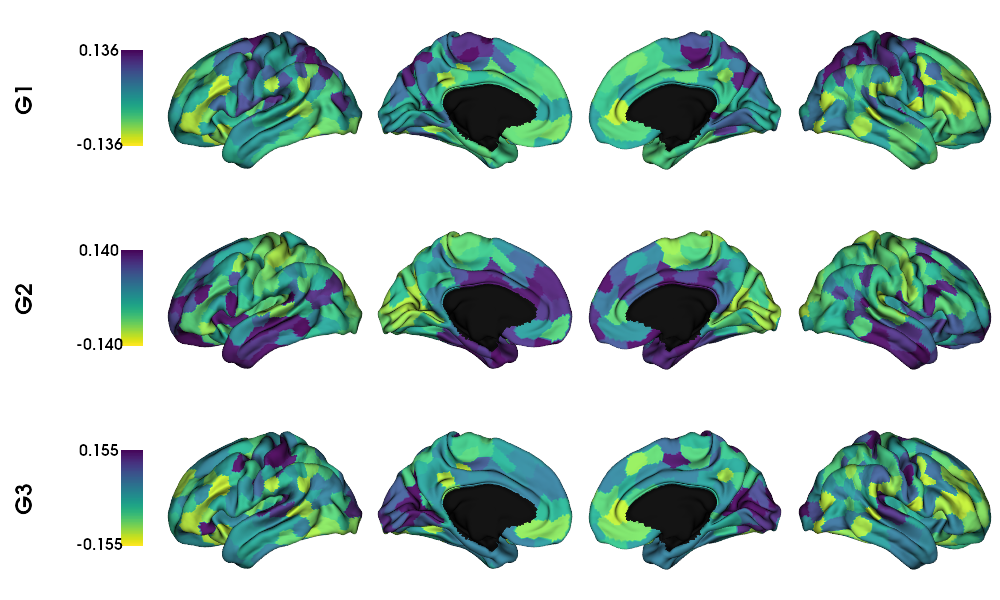

In [55]:
Smax = Gmax.index(max(Gmax))
# Calculate individual gradient aligned to HIST
Subjgm = GradientMaps(n_components=Ngrad, alignment='procrustes', kernel='normalized_angle')
Subjgm.fit(MPC[:,:,Smax], sparsity=0.9, reference=gradient_map.gradients_)

# Map gradients to original parcels
Ngrad=3
MRI_subj = [None] * Ngrad
for i, g in enumerate(Subjgm.aligned_.T[0:Ngrad,:]):
    MRI_subj[i] = map_to_labels(g, schaefer_400, fill=np.nan, mask=schaefer_400 != 0)

ylab=['G'+str(x) for x in list(range(1,Ngrad+1))]
plot_hemispheres(surf_lh, surf_rh, 
                 array_name=MRI_subj, 
                 size=(1000, 600), 
                 cmap='viridis_r',
                  embed_nb=True,  
                 label_text={'left':ylab}, 
                 color_bar='left',
                 zoom=1.25, 
                 nan_color=(0, 0, 0, 1), 
                 color_range='sym' )

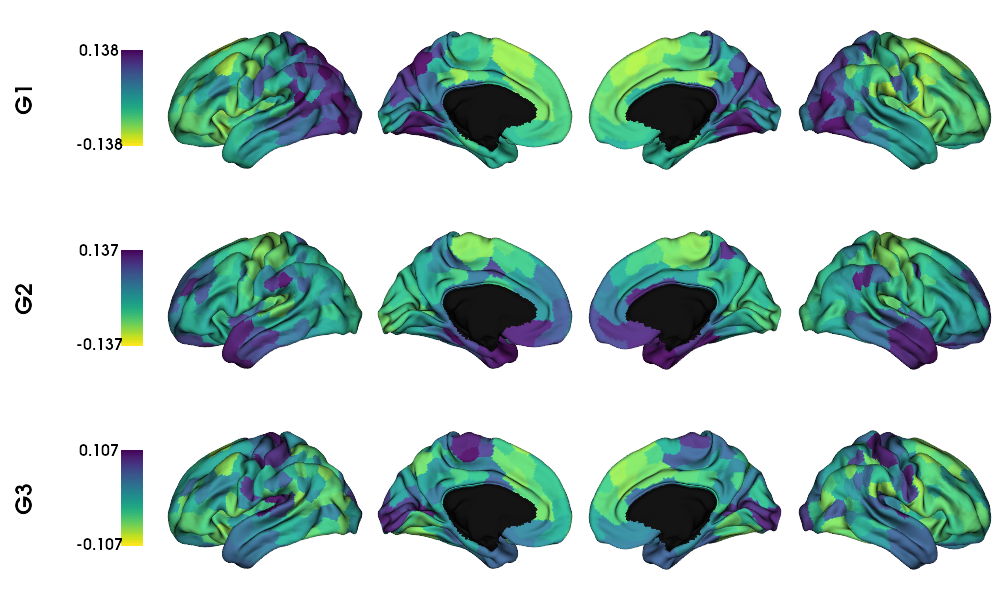

In [62]:
# Map gradients to original parcels
vertexwise_gradient = [None] * Ngrad
for i, g in enumerate(gradient_map.gradients_.T[0:Ngrad,:]):
    vertexwise_gradient[i] = map_to_labels(g, schaefer_400, fill=np.nan, mask=schaefer_400 != 0)

ylab=['G'+str(x) for x in list(range(1,Ngrad+1))]
plot_hemispheres(surf_lh, surf_rh, 
                 array_name=vertexwise_gradient, 
                 size=(1000, 600), 
                 cmap='viridis_r',
                  embed_nb=True,  
                 label_text={'left':ylab}, 
                 color_bar='left',
                 zoom=1.25, 
                 nan_color=(0, 0, 0, 1), 
                 color_range='sym' )

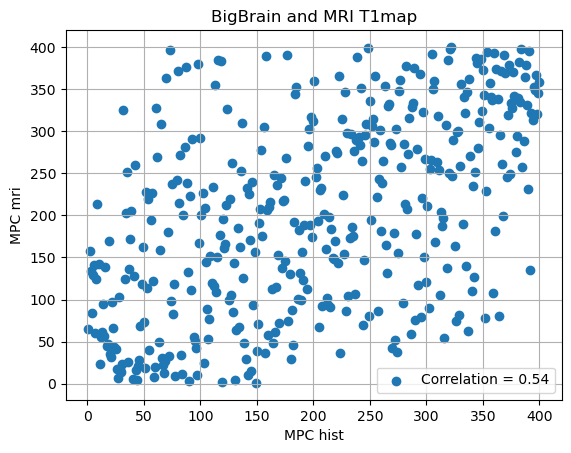

In [65]:
# Calculate the correlation coefficient
g1_his = gradient_map.gradients_[:,1]
g1_mri = Subjgm.aligned_[:,1]

# Remove NaN values
valid_indices = ~np.isnan(g1_his) & ~np.isnan(g1_mri)
g1_his = rankdata(g1_his[valid_indices])
g1_mri = rankdata(g1_mri[valid_indices])
#g1_his = g1_his[valid_indices]
#g1_mri = g1_mri[valid_indices]

# Calculate the Spearman rank correlation coefficient
correlation_coefficient, _ = spearmanr(g1_his, g1_mri)

# Create a scatter plot
plt.scatter(g1_his, g1_mri, label=f'Correlation = {correlation_coefficient:.2f}')
plt.xlabel('MPC hist')
plt.ylabel('MPC mri')
plt.title('BigBrain and MRI T1map')
plt.legend()
plt.grid(True)